In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

sns.set_theme(style="ticks", context="notebook", palette="muted")
%matplotlib inline

In [2]:
data_set = load_breast_cancer()
data = pd.DataFrame(data_set["data"], columns=data_set["feature_names"])
data["target"] = data_set["target"]

In [3]:
data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [4]:
class_names = {"0": "Malignant", "1": "Benign"}

In [5]:
# The original data set contains many variables, for this example we select just 10 of these:
variables = [
    "mean radius",
    "mean texture",
    "mean perimeter",
    "mean area",
    "mean smoothness",
    "mean compactness",
    "mean concavity",
    "mean concave points",
    "mean symmetry",
    "mean fractal dimension",
]
# To use all variables, uncomment the next line:
# variables = [i for i in data.columns if i!= 'target']
print(variables)

['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension']


In [6]:
X = scale(data[variables].values)
pca = PCA(n_components=4)  # Do PCA, but only ask for 4 principal components
scores = pca.fit_transform(X)
pca.components_

array([[ 0.36393793,  0.15445113,  0.37604434,  0.36408585,  0.23248053,
         0.36444206,  0.39574849,  0.4180384 ,  0.21523797,  0.07183744],
       [-0.31392907, -0.14718091, -0.28465789, -0.30484171,  0.40196232,
         0.26601315,  0.10428597,  0.0071836 ,  0.36830091,  0.5717677 ],
       [-0.12442759,  0.95105659, -0.1140836 , -0.12337786, -0.16653247,
         0.05827786,  0.04114649, -0.06855383,  0.03672364,  0.11358395],
       [ 0.02955886,  0.00891608,  0.01345807,  0.01344268, -0.10780203,
        -0.18570041, -0.16665352, -0.07298395,  0.89299848, -0.34933179]])

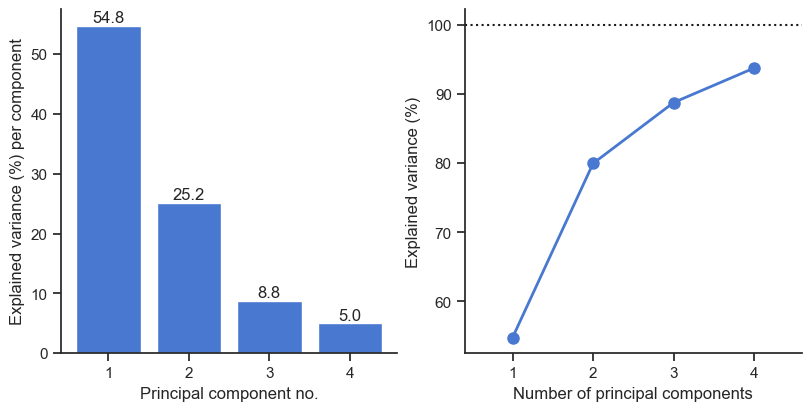

In [7]:
# Plot the explained variance:
fig, (ax1, ax2) = plt.subplots(
    constrained_layout=True, ncols=2, figsize=(8, 4), sharex=True
)
variance = pca.explained_variance_ratio_
components = 1 + np.arange(len(variance))
bar = ax1.bar(components, variance * 100.0)
ax1.bar_label(bar, fmt="{:.1f}")
ax2.plot(
    components, np.cumsum(variance) * 100.0, marker="o", markersize=8, lw=2
)
ax1.set_xlabel("Principal component no.")
ax1.set_ylabel("Explained variance (%) per component")
ax2.set_xlabel("Number of principal components")
ax2.set_ylabel("Explained variance (%)")
ax2.axhline(y=100, ls=":", color="k")
sns.despine(fig=fig)

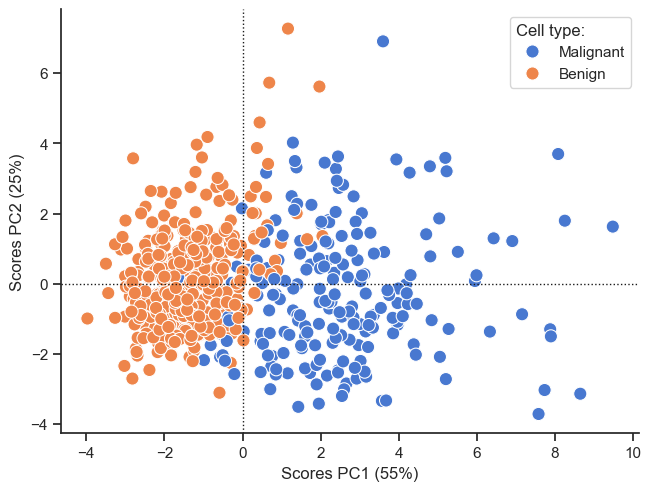

In [8]:
# Plot scores:
fig, ax = plt.subplots(constrained_layout=True)
sns.scatterplot(
    data=data, x=scores[:, 0], y=scores[:, 1], ax=ax, s=90, hue="target"
)

# The rest of the code here is just to style the plot:
ax.axhline(y=0, ls=":", c="k", lw=1)
ax.axvline(x=0, ls=":", c="k", lw=1)
ax.set(xlabel=f"Scores PC1 ({pca.explained_variance_ratio_[0]*100:.2g}%)")
ax.set(ylabel=f"Scores PC2 ({pca.explained_variance_ratio_[1]*100:.2g}%)")

ax.legend(title="Cell type:", alignment="left")
legend = ax.get_legend()
for lab in legend.texts:
    lab.set_text(class_names[lab.get_text()])
sns.despine(fig=fig)

In [9]:
def plot_loadings_arrows(pca, idxi=0, idxj=1, labels=None):
    fig, ax = plt.subplots(constrained_layout=True)

    loadings = pca.components_.T

    load1 = loadings[:, idxi]
    load2 = loadings[:, idxj]

    var1 = pca.explained_variance_ratio_[idxi] * 100
    var2 = pca.explained_variance_ratio_[idxj] * 100

    ax.set(xlabel=f"Loadings PC1 ({var1:.2g}%)")
    ax.set(ylabel=f"Loadings PC2 ({var2:.2g}%)")
    ax.axhline(y=0, ls=":", color="k")
    ax.axvline(x=0, ls=":", color="k")

    ax.scatter(load1, load2, color="none")  # to adjust the axes

    for i in range(pca.n_features_in_):
        x, y = load1[i], load2[i]

        ax.annotate(
            "",
            xy=(x, y),
            xytext=(0, 0),
            arrowprops=dict(
                arrowstyle="-|>", lw=2, color="red", mutation_scale=25
            ),
        )
        txt = f"{i}"
        if labels is not None:
            txt = labels[i]
        ax.text(x, y, txt, fontsize="xx-small")

    ax.set_xlim(-0.6, 0.6)
    ax.set_ylim(-0.6, 0.6)
    ax.set_aspect("equal")
    sns.despine(fig=fig)

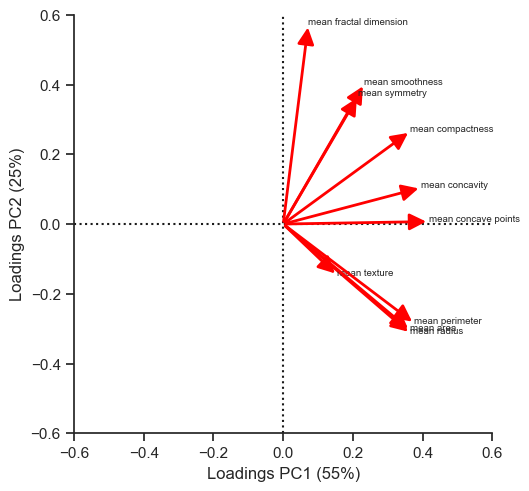

In [10]:
plot_loadings_arrows(pca, idxi=0, idxj=1, labels=variables)

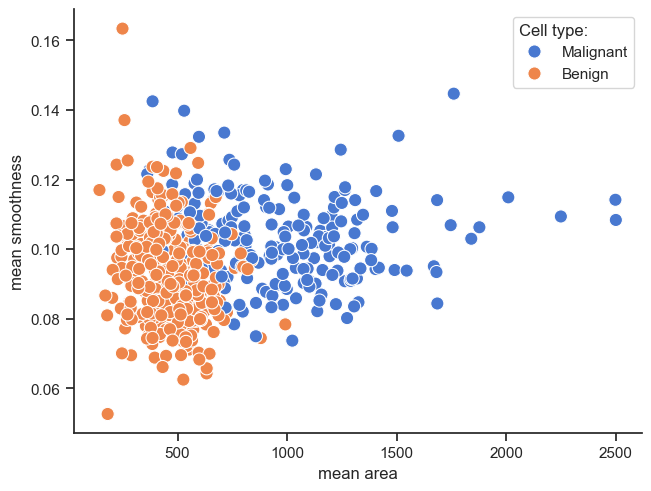

In [11]:
# From the previous plot, it looks like we can separate (to some degree) by using
# just the mean area and the mean smoothness. Let us try this:
fig, ax = plt.subplots(constrained_layout=True)
sns.scatterplot(data=data, x="mean area", y="mean smoothness", hue="target", s=90)
ax.legend(title="Cell type:", alignment="left")
legend = ax.get_legend()
for lab in legend.texts:
    lab.set_text(class_names[lab.get_text()])
sns.despine(fig=fig)